Ces déclarations sont obligatoires, il faut les copier coller dans chaque nouveau document et les exécuter (Shift + Return) au début

In [1]:
%matplotlib inline

In [2]:
import imp
from matplotlib import pyplot as plt
import math

Les fonctions que j'ai définies: il faut les charger toutes et les rendre disponibles dans le document:

In [3]:
from premier_jet import *

Chargeons une image (2020.png) et découpons la en forme de trapèze (montré en basse résolution juste pour donner une indication):

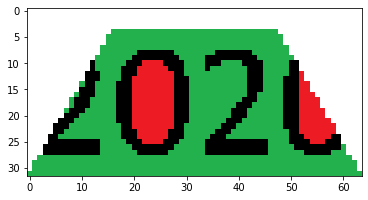

In [4]:
coins_trapeze = trapezes_empiles_en_triangle(2)[0]
trapeze = decoupe_polygone_convexe(image_pixelisee('2020.png', 
                                                   coins_trapeze[0],
                                                   [coins_trapeze[1][0], coins_trapeze[2][1]]),
                                   coins_trapeze)
montre(trapeze, [0, 0], [2, 1], 32)

Maintenant, répétons ce trapèze 3 fois mais en l'assemblant en forme de triangle (montré en basse résolution juste pour donner une indication):

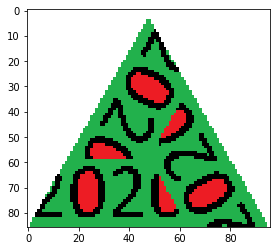

In [6]:
trapezes_en_triangle = superpose(trapeze,
                                 translation(rotation(trapeze, 120), [3, 0]),
                                 translation(rotation(trapeze, -120), [1.5, 3 * math.sqrt(3) / 2]))
montre(trapezes_en_triangle, [0, 0], [3, 2.7], 32)

Assemblons deux triangles pareils en forme de parallélogramme (montré en basse résolution juste pour donner une indication):

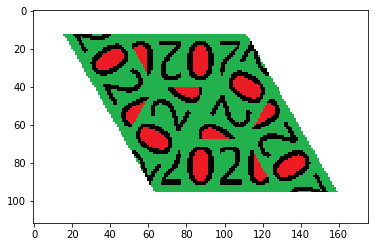

In [8]:
deux_triangles = superpose(trapezes_en_triangle,
                           translation(rotation(trapezes_en_triangle, 180), [1.5, 3 * math.sqrt(3) / 2]))
montre(deux_triangles, [-2, -0.5], [3.5, 3], 32)

Essayons maintenant la même chose, mais en déformant l'image plutôt qu'en la tronquant (toujours en basse résolution pour accélérer les calculs pendant que nous explorons les dessins que nous pouvons faire.

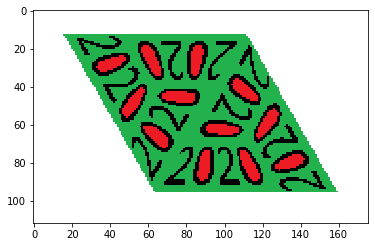

In [11]:
coins_trapeze = trapezes_empiles_en_triangle(2)[0]
trapeze = deforme_rectangle_en_trapeze(image_pixelisee('2020.png', 
                                                       coins_trapeze[0],
                                                       [coins_trapeze[1][0], coins_trapeze[2][1]]),
                                       coins_trapeze[1][0] - coins_trapeze[0][0],
                                       coins_trapeze[2][1],
                                       (coins_trapeze[2][0] - coins_trapeze[3][0]))
trapezes_en_triangle = superpose(trapeze,
                                 translation(rotation(trapeze, 120), [3, 0]),
                                 translation(rotation(trapeze, -120), [1.5, 3 * math.sqrt(3) / 2]))
deux_triangles = superpose(trapezes_en_triangle,
                           translation(rotation(trapezes_en_triangle, 180), [1.5, 3 * math.sqrt(3) / 2]))
montre(deux_triangles,
       [-2, -0.5],
       [3.5, 3],
       32)

Ces parallélogrammes peuvent être répétes comme des pavés pour remplir tout le plan (la partie du plan montrée et sa résolution sont plus grandes... le calcul prendra plus de temps):

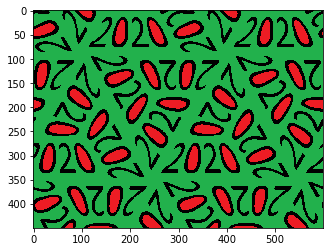

In [12]:
pavage = pavage_parallelogramme(deux_triangles,
                                [0, 0],
                                [-coins_trapeze[1][0] * 3/4, coins_trapeze[2][1] * 3],
                                [coins_trapeze[1][0] * 3/2, 0])
montre(pavage, [-2.5, -1], [3.5, 3.5], 100)

La fonction spéciale `comprime_dans_un_cercle` force tout le plan à rentrer dans le cercle en rendant les détails loin de l'origine de plus en plus petits.  Montrons une image en basse résolution pour donner une idée et sauvons la même image en haute résolution.

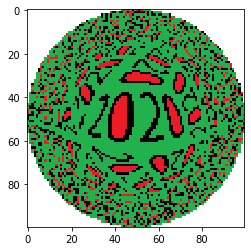

In [13]:
rayon = 0.5
dans_le_cercle = comprime_dans_un_cercle(translation(pavage, [-1, -math.sqrt(3) / 4]), rayon)
montre(dans_le_cercle, [-rayon, -rayon], [rayon, rayon], 100)
sauve('cercle_haute_resolution.png', dans_le_cercle, [-rayon, -rayon], [rayon, rayon], 1024)

Nous pouvons aussi empiler tous les trapèzes pour créer un triangle, en utilisant la fonction `trapezes_empiles_en_triangle` pour trouver leurs coordonnées:

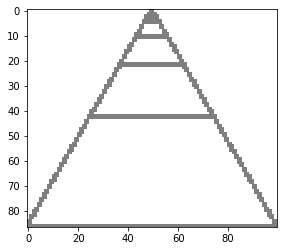

In [14]:
trapezes = trapezes_empiles_en_triangle(1, limite=0.01)
montre(superpose(*[polygone(trapeze, 0.02, [0.5, 0.5, 0.5, 1]) for trapeze in trapezes]), [0, 0], [1, math.sqrt(3) / 2], 100)

Si nous remplissons chaque trapèze avec l'image, ça donne ceci (après avoir déplacé avec `translation` et adapté la taille avec `homothetie` l'image à chaque trapèze):

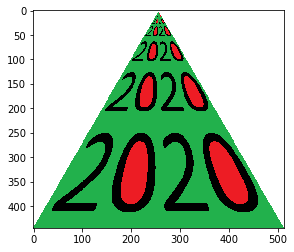

In [15]:
vingt_vingt = deforme_rectangle_en_trapeze(image_pixelisee('2020.png', trapezes[0][0], [trapezes[0][1][0], trapezes[0][2][1]]),
                                           trapezes[0][1][0] - trapezes[0][0][0],
                                           trapezes[0][2][1],
                                           (trapezes[0][2][0] - trapezes[0][3][0]))
montre(superpose(*[translation(homothetie(vingt_vingt,
                                          [0, 0],
                                          trapeze[1][0] - trapeze[0][0]),
                               trapeze[0])
                   for trapeze in trapezes]),
       [0, 0],
       [1, 0.87],
       512)